Code python à enrichir!! pour rechercher toutes les images d'un site donné par un URL ainsi qu'un autre code (c dans le mm pour linstant) pour vérifier si une image provenant de son google drive se trouve dans le site donnée par l'URL

In [ ]:
pip install opencv-python requests BeautifulSoup4


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


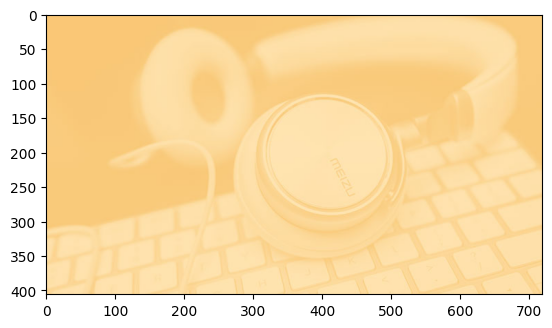

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

img = mpimg.imread('/content/drive/My Drive/Philharmonie/images/bg-menu-type-audio-hover.jpg')
plt.imshow(img)
plt.show()


In [ ]:
import cv2
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin

def download_images_from_website(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    img_tags = soup.find_all('img')
    img_urls = [urljoin(url, img['src']) for img in img_tags if 'src' in img.attrs]
    return img_urls

def compare_images(target_img_path, img_urls):
    target_img = cv2.imread(target_img_path, cv2.IMREAD_GRAYSCALE)
    for img_url in img_urls:
        response = requests.get(img_url, stream=True)
        response.raw.decode_content = True
        img = cv2.imdecode(np.frombuffer(response.raw.read(), np.uint8), cv2.IMREAD_GRAYSCALE)
        if img is not None and img.shape[0] >= target_img.shape[0] and img.shape[1] >= target_img.shape[1]:
            res = cv2.matchTemplate(img, target_img, cv2.TM_CCOEFF_NORMED)
            _, max_val, _, _ = cv2.minMaxLoc(res)
            if max_val > 0.95:  # similitude supérieure ou égale à 0,95 (95%).
                print(f"Image trouvée à l'URL : {img_url}")
      #  else:
        #  print(f"Image non trouvée à l'URL : {img_url}")


if __name__ == "__main__":
    website_url = "https://pad.philharmoniedeparis.fr"
    target_image_path = "/content/drive/My Drive/Philharmonie/images/philharmonie_concert_nouvel-an-chinois_2018_by_william-beaucardet.jpeg"

    img_urls = download_images_from_website(website_url)
    compare_images(target_image_path, img_urls)


In [ ]:
import cv2
import requests
import numpy as np
from bs4 import BeautifulSoup
from urllib.parse import urljoin

def download_images_from_website(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    img_tags = soup.find_all('img')
    img_urls = [urljoin(url, img['src']) for img in img_tags if 'src' in img.attrs]
    return img_urls

def compare_images(target_img_path, img_urls):
    target_img = cv2.imread(target_img_path, cv2.IMREAD_GRAYSCALE)
    for img_url in img_urls:
        try:
            response = requests.get(img_url, stream=True)
            response.raw.decode_content = True
            img = cv2.imdecode(np.frombuffer(response.raw.read(), np.uint8), cv2.IMREAD_GRAYSCALE)
            if img is not None and img.shape[0] >= target_img.shape[0] and img.shape[1] >= target_img.shape[1]:
                res = cv2.matchTemplate(img, target_img, cv2.TM_CCOEFF_NORMED)
                _, max_val, _, _ = cv2.minMaxLoc(res)
                if max_val > 0.8:  # Ajuster le seuil si nécessaire
                    print(f"Image trouvée à l'URL : {img_url}")
        except:
            pass  # Ignorer les erreurs

if __name__ == "__main__":
    website_url = "https://pad.philharmoniedeparis.fr/"
    target_image_path = "/content/drive/My Drive/Philharmonie/images/philharmonie_concert_nouvel-an-chinois_2018_by_william-beaucardet.jpeg"

    img_urls = download_images_from_website(website_url)
    print("Toutes les images trouvées sur le site :")
    for url in img_urls:
        print(url)
    print("\nRecherche de l'image cible sur le site...")
    compare_images(target_image_path, img_urls)


Toutes les images trouvées sur le site :
https://pad.philharmoniedeparis.fr/ui/skins/CIMU/images/Logos/logo-PP-EXT-blanc.svg
https://pad.philharmoniedeparis.fr/ui/skins/CIMU/images/Logos/logo-PP-Live.svg
https://pad.philharmoniedeparis.fr/ui/skins/CIMU/images/Logos/logo-PP-EXT-blanc.svg
https://philharmoniedeparis.fr/sites/default/files/styles/magazine_article_card/public/2023-04/Philippe-Druillet-Zombie-Zombie.jpg?h=4a9847b4&amp;itok=DUrwRm0d
https://pad.philharmoniedeparis.fr/ui/skins/CIMU/images/Logos/logo-PP-PAD-blanc.svg
https://pad.philharmoniedeparis.fr/ui/skins/MEDIA/images/selections-thematiques/bg-kurt-weill.jpg
https://pad.philharmoniedeparis.fr/ui/skins/CIMU/images/Logos/logo-PP-EDUTHEQUE-blanc.svg
https://pad.philharmoniedeparis.fr/ui/skins/MEDIA/images/mediatheque-philharmonie-de-paris.jpg
https://pad.philharmoniedeparis.fr/ui/skins/MEDIA/images/logo-pp-a-la-demande.svg
https://pad.philharmoniedeparis.fr/ui/skins/MEDIA/images/icon/pictos-nav/home.png
https://pad.philharmo